# Exploration of Twitter attitudes toward Presidental Candidates
- Used tweepy library to scrape data & output json file
- Listener stream filtered with keywords: 'trump', 'cruz', 'kasich', 'rubio', 'carson', 'clinton', 'sanders' 
- Data collected for 90 minutes February 26, day before SC primary

In [3]:
import json
import numpy as np
import tweetExplore_fns as fns   # loading functions written for this project
import importlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd

sns.set_context("talk")
sns.set_style('darkgrid')

importlib.reload(fns);
%matplotlib inline

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### *Initial Organization of the Data*

In [4]:
# import data 
with open('../data/raw_tweets1_5hr_candidates.json') as data_file:
    rawdata = json.load(data_file)

# selects only tweets that have text 
tweet_list = fns.extract_tweets(rawdata)
        
# extract indices + tweets for tweets that also have a fields of interest - here gps coordinate
coord_index_list, coord_tweet_list = fns.extract_tweets_interest_field(tweet_list, "coordinates")

print('N Tweets', len(tweet_list), 'N coordinates:', len(coord_index_list))

N Tweets 189042 N coordinates: 129


## *Sentiment Analysis*

- Are tweets about each candidate positive or negative? 


#### Total Number of Tweets per Candidate

In [5]:
candidates = ['Trump', 'Cruz', 'Kasich', 'Rubio', 'Carson', 'Clinton', 'Sanders']  #track list

# for each candidate
tweet_index_store = []
subjectivity_store = []
polarity_store = []
for iperson, val in enumerate(candidates):
    # save each candidate's list of polarity etc. in a list 
    person_sentiment_polarity, person_sentiment_subjectivity, person_tweetInd = \
        fns.extract_sentiment(tweet_list, candidates[iperson])
    
    # store tweet polarity (sentiment pos/neg) for each candidate
    polarity_store.append(person_sentiment_polarity)
    
    # store tweet subjectivity for each candidate
    subjectivity_store.append(person_sentiment_subjectivity)
    
    # store indices for tweets about each candidate
    tweet_index_store.append(person_tweetInd)

Trump   # tweets: 110392
Cruz   # tweets: 18673
Kasich   # tweets: 1601
Rubio   # tweets: 42703
Carson   # tweets: 2608
Clinton   # tweets: 9846
Sanders   # tweets: 7256


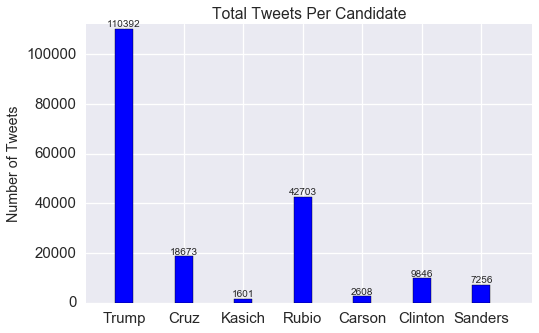

In [6]:
candidate_tweets = []

# for each candidate, get counts of: 
# tweets, positive tweets, negative tweets, 
# average positive sentiment, average negative sentiment
for iperson, candidate in enumerate(candidates):
    candidate_tweets.append(len(tweet_index_store[iperson]))  # number tweets total
    
# function to label the bars with their value
def autolabel_int_single_axis(rects):
    """attach labels to bars, integers"""
    for rect in rects:
        height = rect.get_height();
        plt.text(rect.get_x() + rect.get_width() / 2., height + .03,
                '%d' % int(height),
                ha='center', va='bottom');

# Plot the total number of tweets per candidate
fig = plt.figure(figsize=(8, 5));
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
ymax = np.max(candidate_tweets) + 2000
width = .3

ind = np.arange(len(candidates)) + 1
rect1 = plt.bar(ind, candidate_tweets, width, color='blue')

plt.title("Total Tweets Per Candidate")
plt.xlim([.5, 8])
plt.ylim([0, ymax])
plt.ylabel('Number of Tweets')
plt.xticks(ind + width / 2, candidates)
autolabel_int_single_axis(rect1);

### Positive vs. Negative Tweets
- Number & Rating of Positive/Negative tweets

In [7]:
# sort tweets into positive/negative lists for each candidate 

store_pos_polarity = []
store_ind_pos_polarity = []
store_tweet_pos_polarity = []
store_neg_polarity = []
store_ind_neg_polarity = []
store_tweet_neg_polarity = []
pos_neg_ratio = []
pos_tweets = []
neg_tweets = []
avg_pos = []
avg_neg = []

# for each candidate
for iperson, val in enumerate(candidates):
    # sort each sentiment score into positive or negative sentiment categories, outputs are:
    # lists of each pos. and neg. sentiment score: pos_polarity, neg_polarity
    # lists of the indices for each tweet w. a pos/neg score: ind_pos_polarity, ind_neg_polarity
    # lists of the texts for each tweet that has a pos/neg tscore: 
                                        #tweet_pos_polarity, tweet_neg_polarity
    pos_polarity, neg_polarity, ind_pos_polarity, ind_neg_polarity, \
        tweet_pos_polarity, tweet_neg_polarity = \
        fns.sort_tweets_pos_neg(iperson, polarity_store, tweet_index_store, tweet_list)
    
    # store each candidates lists in a master list
    store_pos_polarity.append(pos_polarity)              # positive sentiment scores
    store_ind_pos_polarity.append(ind_pos_polarity)      # indices of tweets w. pos. scores
    store_tweet_pos_polarity.append(tweet_pos_polarity)  # positive tweet texts
    store_neg_polarity.append(neg_polarity)              # negative sentiment scores
    store_ind_neg_polarity.append(ind_neg_polarity)      # indices of tweets w. neg. scores 
    store_tweet_neg_polarity.append(tweet_neg_polarity)  # negative tweet texts
    
    # get the ratio of positive to negative tweets
    pos_neg_ratio.append(len(ind_pos_polarity)/len(ind_neg_polarity))
    
    # get counts of # of pos/neg tweets, and the average pos/neg sentiment scores
    pos_tweets.append(len(ind_pos_polarity))  # number positive tweets
    neg_tweets.append(len(ind_neg_polarity))  # number negative tweets
    avg_pos.append(np.average(pos_polarity))  # avg positive tweet sentiment score
    avg_neg.append(np.average(neg_polarity))  # avg negative tweet sentiment score
    
    # print number of positive/negative tweets per person, 
    # and their average positive/negative sentiment score
    print(candidates[iperson], '# Tweets: Positive', len(ind_pos_polarity), \
          'Negative', len(ind_neg_polarity), ' Avg. Sentiment: Positive %.2f' \
          % np.average(pos_polarity), 'Negative %.2f' % np.average(neg_polarity))


Trump # Tweets: Positive 37515 Negative 21795  Avg. Sentiment: Positive 0.35 Negative -0.30
Cruz # Tweets: Positive 7248 Negative 3368  Avg. Sentiment: Positive 0.34 Negative -0.29
Kasich # Tweets: Positive 638 Negative 296  Avg. Sentiment: Positive 0.37 Negative -0.23
Rubio # Tweets: Positive 14692 Negative 11474  Avg. Sentiment: Positive 0.32 Negative -0.25
Carson # Tweets: Positive 885 Negative 413  Avg. Sentiment: Positive 0.39 Negative -0.25
Clinton # Tweets: Positive 3577 Negative 1792  Avg. Sentiment: Positive 0.35 Negative -0.24
Sanders # Tweets: Positive 2184 Negative 1333  Avg. Sentiment: Positive 0.32 Negative -0.26


#### Ratio of Positive and Negative Tweets per Candidate

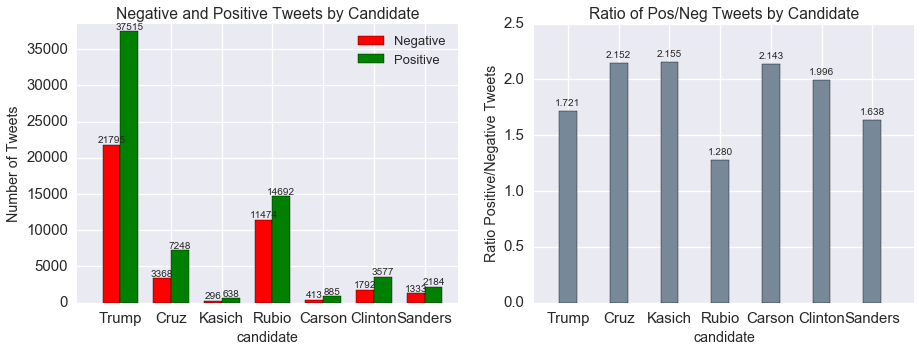

In [8]:
# initial variables for both graphs
width = 0.35       # the width of the bars
ind = np.arange(len(candidates)) + 1 # shift x location by 1 
ax = [0, 1]

# set up figure + subplots
fig = plt.figure(figsize=(15, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax[0] = plt.subplot(gs[0])

# plot data for number positive or negative tweets
rectsNeg = ax[0].bar(ind, neg_tweets, width, color='r') 
rectsPos = ax[0].bar(ind + width, pos_tweets, width, color='g')

# set up axes
ymax = np.max([neg_tweets, pos_tweets]) + 1000  # get upper bound for graph
ax[0].set_xlim([.5, 8])
ax[0].set_ylim([0, ymax])
ax[0].set_xticks(ind + width)

# add text for labels, title, legend
ax[0].set_title('Negative and Positive Tweets by Candidate')
ax[0].legend((rectsNeg[0], rectsPos[0]), ('Negative', 'Positive'))
ax[0].set_xlabel("candidate")
ax[0].set_ylabel("Number of Tweets")
ax[0].set_xticklabels(candidates)

# label bars with y value, integer
fns.autolabel_int(rectsNeg, ax, 0, neg_tweets)
fns.autolabel_int(rectsPos, ax, 0, pos_tweets)

# plot second graph - ratio of positive/negative tweets 
ax[1] = plt.subplot(gs[1])
rectRatio = ax[1].bar(ind, pos_neg_ratio, width, color='lightslategray') 

# set up axes
ax[1].set_xticks(ind + width / 2)
ax[1].set_xlim([.5, 8])

# add text for labels, title, legend
ax[1].set_title('Ratio of Pos/Neg Tweets by Candidate')
ax[1].set_xlabel("candidate")
ax[1].set_ylabel("Ratio Positive/Negative Tweets")
ax[1].set_xticklabels(candidates)  

# label y value of bars, decimal 
fns.autolabel_dec(rectRatio, ax, 1, pos_neg_ratio)
plt.show();

#### Degree / Distribution of Sentiment

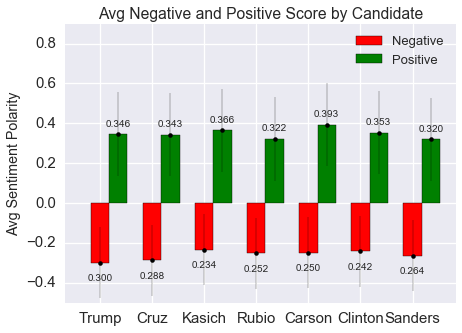

In [9]:
std_pos = []
std_neg = []
sterr_pos = []
sterr_neg = []
for icand, candidate in enumerate(candidates):
    # get standard deviation and standard error for the pos/neg scores for each candidate
    std_pos.append(np.std(store_pos_polarity[iperson]))
    std_neg.append(np.std(store_neg_polarity[iperson]))
    sterr_pos.append(np.std(store_pos_polarity[iperson])/
                     np.sqrt(len(store_pos_polarity[iperson])))
    sterr_neg.append(np.std(store_neg_polarity[iperson])/
                     np.sqrt(len(store_neg_polarity[iperson])))

# set up figure
ind = np.arange(len(candidates)) + 1  # shift x one
width = 0.35       # the width of the bars
fig = plt.figure(figsize=(7, 5)) 

# set up axes
plt.xticks(ind + width / 2, candidates)
plt.xlim([.5, 8])
plt.ylim([-.5, .9])

# plot avg positive/negative scores
rectsNeg = plt.bar(ind, avg_neg, width, color='r')  
rectsPos = plt.bar(ind + width, avg_pos, width, color='g') 

# plot standard deviation errorbars
plt.errorbar(ind + width / 2, avg_neg, yerr=std_neg, fmt='.', color='k', elinewidth=.3)
plt.errorbar(ind + width * 1.5, avg_pos, yerr=std_pos, fmt='.', color='k', elinewidth=.3)

# add some text for labels, title and axes
plt.title('Avg Negative and Positive Score by Candidate')
plt.legend((rectsNeg[0], rectsPos[0]), ('Negative', 'Positive'))
# plt.xlabel("candidate")
plt.ylabel("Avg Sentiment Polarity")

# label bars with y value, decimal 
def autolabel_dec_single_axis(rects, vals):
    """attach labels to bars, 3 decimals"""
    i = 0
    for rect in rects:        
        height = rect.get_height()
        if vals[i] > 0:
            plt.text(rect.get_x() + rect.get_width() / 2., height + .03,
                '%0.3f' % height,
                ha='center', va='bottom')
        else:
            plt.text(rect.get_x() + rect.get_width() / 2., -1 * (height + .1),
                '%0.3f' % height,
                ha='center', va='bottom')
        i = i+1

autolabel_dec_single_axis(rectsNeg, avg_neg)
autolabel_dec_single_axis(rectsPos, avg_pos)

plt.show();


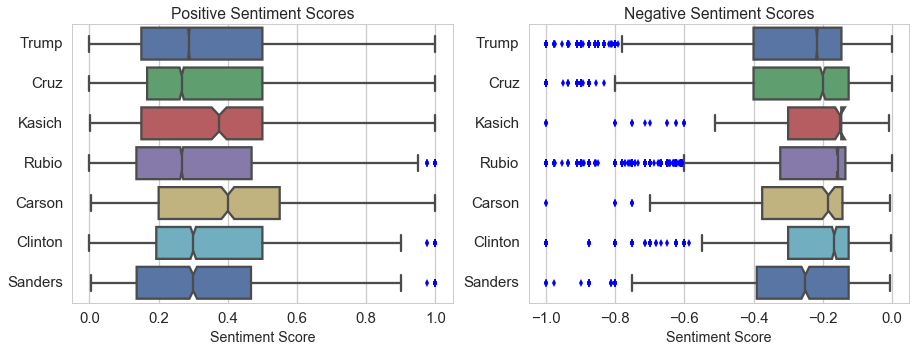

In [10]:
ax = [0, 1]
sns.set_style("whitegrid")

# Box and Whisker plots for the positive sentiment ratings 

# set up figure + subplots
fig = plt.figure(figsize=(15, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
ax[0] = plt.subplot(gs[0])

# plot positive scores
ax[0] = sns.boxplot(data=store_pos_polarity, orient="h", palette="deep", notch=1)

# set up axes/labels
ax[0].set_xlim([-.05, 1.05])
ax[0].set_title('Positive Sentiment Scores');
ax[0].set_xlabel('Sentiment Score')
ax[0].set_yticklabels(candidates);


# Box and Whisker plots for the negative sentiment ratings 
ax[1] = plt.subplot(gs[1])

# plot negative scores
ax[1] = sns.boxplot(data=store_neg_polarity, orient="h", palette="deep", notch=1)

# set up axes/labels
ax[1].set_xlim([-1.05, .05])
ax[1].set_xlabel('Sentiment Score')
ax[1].set_title('Negative Sentiment Scores');
ax[1].set_yticklabels(candidates);


- Low variability in distribution of positive tweet scores 
- The negative tweets show a bit more variability 
- Kasich interestingly has the least negative distribution, aligning with his moderate reputation

### Are these measures representative of other rankings?

In [11]:
# ['Trump', 'Cruz', 'Kasich', 'Rubio', 'Carson', 'Clinton', 'Sanders'] (reminder of order)
# favorable & unfavorable scores from Real Clear Politics 2/26/16
rcp_favorable = np.array([34.4, 34.6, 19.7, 35.2, 36.2, 42.2, 38.4])
rcp_unfavorable = np.array([57.8, 40.0, 27.0, 38.0, 41.2, 51.4, 38.2])

# ratio favorable / unfavorable poll
fav_unfav_ratio = rcp_favorable/rcp_unfavorable

# pearson corrleation between favorable/unfavorable and positive/negative ratios
rcp_pearson_corr = np.corrcoef(fav_unfav_ratio, pos_neg_ratio)

# 538 Polling averages from 2/26/16 
# ['Trump', 'Cruz', 'Kasich', 'Rubio', 'Carson', 'Clinton', 'Sanders'] (reminder of order)
avg_538 = [35.5, 19.6, 7.4, 16.4, 8.1, 50.3, 38.6]

# pearson correlation between 538 average poll 
# and % of tweets in dataset mentioning each candidate 
num_tweet_array = np.array(candidate_tweets)
proportion_tweets = (num_tweet_array / num_tweet_array.sum()) * 100
numTweets_538_pearson_corr = np.corrcoef(avg_538, proportion_tweets)

#### Correlation of Sentiment with Other Ratings
- correlation of positive/negative sentiment ratio with Favorable/Unfavorable scores from Real Clear Politics

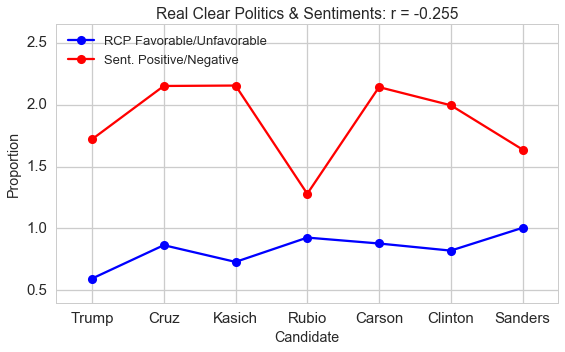

In [13]:
# Plot the correlations:
ind = np.arange(len(candidates)) + 1 # shift x one
fig = plt.figure(figsize=(9, 5)) 

# set up axes
ymax = np.max([pos_neg_ratio, fav_unfav_ratio]) + .5
plt.xticks(ind, candidates)
plt.ylim([.4, ymax])
plt.xlim([.5, len(candidates) + .5])

# plot ratios for Real Clear Politics 
lineFav = plt.plot(ind, fav_unfav_ratio, c='b', marker='o')
linePos = plt.plot(ind, pos_neg_ratio, c='r', marker='o')

# labels
plt.title('Real Clear Politics & Sentiments: r = %0.3f' % rcp_pearson_corr[0][1])
plt.ylabel("Proportion")
plt.xlabel("Candidate")
plt.legend((lineFav[0], linePos[0]), ('RCP Favorable/Unfavorable', \
                                        'Sent. Positive/Negative'), loc=2);

#### Correlation of Number of Tweets with Polling Support 
- correlation of percent tweets in dataset mentioning a specific candidate, and the average polls reported on 538

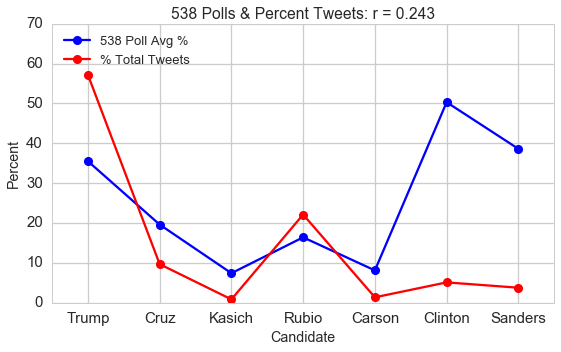

In [14]:
# plot ratios for 538
fig = plt.figure(figsize=(9, 5)) 
line538 = plt.plot(ind, avg_538, c='b', marker='o')
lineProp = plt.plot(ind, proportion_tweets, c='r', marker='o')

# set up axes
plt.xticks(ind, candidates)
plt.xlim(.5, len(candidates) + .5)
plt.ylim([0, 70])

# labels
plt.legend((line538[0], lineProp[0]), ('538 Poll Avg %', '% Total Tweets'), loc=2)
plt.title('538 Polls & Percent Tweets: r = %0.3f' % numTweets_538_pearson_corr[0][1])
plt.ylabel("Percent")
plt.xlabel("Candidate")
plt.show;

- Small positive correlation between the 538 polls and the % of tweets mentioning each candidate in this dataset

#### GOP only

In [15]:
rep_numTweets_538_pearson_corr = np.corrcoef(avg_538[:5], candidate_tweets[:5])
print('GOP only correlation coefficient between 538 Avg Polls and Number of Tweets: %0.3f' \
      % rep_numTweets_538_pearson_corr[0][1])


GOP only correlation coefficient between 538 Avg Polls and Number of Tweets: 0.949


- High correlation (p = 0.014) between polling support and % tweets about each candidate
- More tweets = more votes ?

## Who has a rival?
- Candidates mentioned in the same tweet

In [16]:
rival_index_store = []
rival_count_store = []

# for each candidate
for iperson, val in enumerate(candidates):
    current_inds = tweet_index_store[iperson]
    
    # remove current candidate from list, so cannot be own rival
    rival_list_temp = np.arange(len(candidates)) 
    mask_self = np.ones(rival_list_temp.shape, dtype=bool)
    mask_self[iperson] = 0
    rival_list = rival_list_temp[mask_self]
    
    # count number of tweets with each pair of candidates + get indices
    [rival_index_temp, count] = fns.rival_count(rival_list, current_inds, candidates, tweet_list)
    rival_count_store.append(count)
    rival_index_store.append(rival_index_temp)
#     print(val, count)

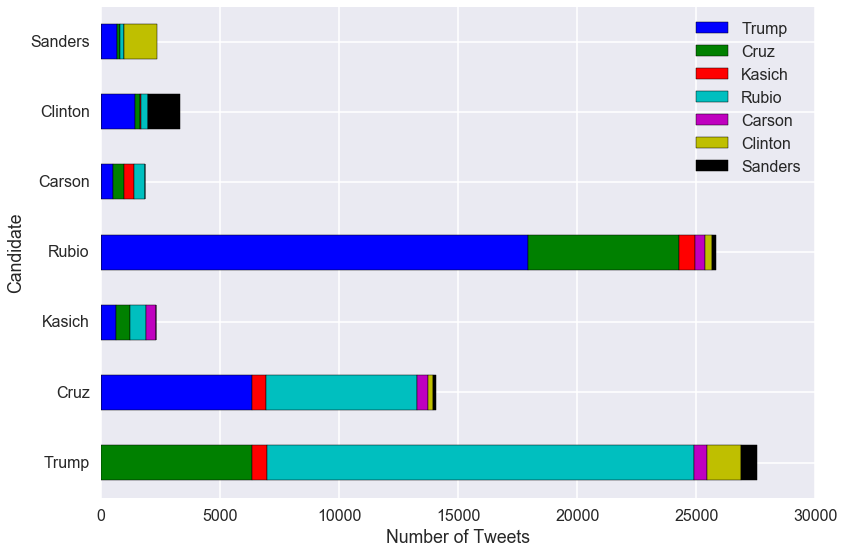

In [17]:
# plot the proportion of tweets with a second candidate mentioned - for each candidate
sns.set_context('poster')
sns.set_style('darkgrid')
x = np.arange(len(candidates))
df2 = pd.DataFrame(rival_count_store, columns=candidates)
df2.plot(kind='barh', stacked=True)
plt.yticks(x, candidates) 
plt.xlabel('Number of Tweets')
plt.ylabel('Candidate');

#### #1 Rival for each candidate
- Which candidates are mentioned together MOST frequently?

In [18]:
maxRival = []
maxRival_ind = []
store_rival_tweets = []

for icand, cand in enumerate(candidates):
    # get list of all candidates except current one
    rival_list_temp = np.arange(len(candidates)) 
    mask_self = np.ones(rival_list_temp.shape, dtype=bool)
    mask_self[icand] = 0
    rival_array = rival_list_temp[mask_self]
    rival_list = rival_array.tolist()
    
    # get max count index of simultaneous mentions to select top rival 
    cur_maxRival_ind = np.argmax(rival_count_store[icand])
    
    # store index of max rival 
    maxRival_ind.append(cur_maxRival_ind)
    
    # store rival name 
    maxRival.append(candidates[cur_maxRival_ind])

    # index of rival from rival only list
    rival_only_ind = rival_list.index(cur_maxRival_ind)
    
    # store tweets with rival 
    store_rival_tweets.append(rival_index_store[icand][rival_only_ind])
    print(cand, "'s top rival is:", candidates[cur_maxRival_ind])

Trump 's top rival is: Rubio
Cruz 's top rival is: Rubio
Kasich 's top rival is: Rubio
Rubio 's top rival is: Trump
Carson 's top rival is: Trump
Clinton 's top rival is: Trump
Sanders 's top rival is: Clinton


- Trump & Rubio are the #1 rival for nearly every other candidate
- Reflective of the competition at that time (late Feb.)

## Next
- Topic analysis: What issues drive the rivalries? 
- Predict votes as candidates drop out
    - *Collect larger dataset and identify user preferred candidates*
    - *Predict who would gain user vote if preferred candidate drops out*